In [1]:
import os
import json
import torch
import numpy as np
import matplotlib.pyplot as plt

from heritability import main

/home/laetitia/miniconda3/envs/aces/lib/python3.10/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


In [7]:
def plot_res(data):
    plt.hist(data['embedding_similarity'], bins=50, alpha=0.4, label='mutated')
    plt.hist(data['embedding_similarity_scrambled'], bins=50, alpha=0.4, label='scrambled')
    plt.xlim((0.7, 1.0))
    plt.xlabel('Cosine sim')
    plt.ylabel('Count')
    plt.legend()

In [3]:
prompt_to_test = """    You are a helpful assistant to a Professor teaching a programming course in Python.
    The Professor wants to give some puzzles to his master's students to teach them Python.

    I already have a series of Python Programming Puzzles (P3). Each puzzle consists of two functions: a problem function `f` and its corresponding solution `g`. The challenge lies in constructing a SAT problem `f` and a function `g` such that `f(g())` evaluates to `True`.
    I will provide two existing puzzles for reference, and I need you to create five new distinct puzzles (Puzzle 2 to Puzzle 6), each being a slight variation derived from Puzzle {N}.
    
    Rules:
    - Each puzzle includes two functions: `def f(...)` and `def g(...)`.
    - The first argument of `f` is always the output from `g()`.
    - Ensure `f` and `g` have matching argument signatures (e.g., `def f(arg0, arg1=value1, arg2=value2, ...)` and `def g(arg1=value1, arg2=value2, ...)`).
    - Avoid using `f` inside `g`, and `g` inside `f`.
    - Include any necessary imports so your code runs smoothly.
    - Give a clear Puzzle description that must be brief and diverse compared to the other puzzles.
    - Make sure the puzzle is self-contained within these two functions.

    Puzzle Format:
    Puzzle description: A brief, one to two sentence summary of the puzzle's content.
    ```python
    def f(solution, args=...) -> bool:
        # Python code to test the solution returned by g.
        # This function is a test unit and must return True if the solution is correct, and False otherwise.

    def g(args=...) -> solution:
        # Python code to generate a solution for the problem.
        # The solution should generalize to all possible args.
        return solution

    assert f(g()) == True
    ```
    {examples}
    Your Task:
    Create five new Python Programming Puzzles (Puzzle 2 to Puzzle 6).
    Ensure that each new puzzle is very simlar to Puzzle {N}, only adding a bit of complexity."""

In [4]:
os.environ['AZURE_OPENAI_API_KEY']  # this must be set

'bda91920a5c040b189a1a4ee41043529'

In [9]:
metric_dict = main(prompt_to_test=prompt_to_test, num_puz=100)

----------------- Config ---------------
model:
  output_dir: logs/
  seed: 0
  fp16: true
  cuda: true
  gpus: 1
  deterministic: false
  top_p: 1.0
  temp: 0.7
  gen_max_len: -1
  batch_size: 10
  model_type: openai
  model_path: gpt-35-0125
  azure: true
  azure_endpoint: https://petunia-3.openai.azure.com/
  parrallel_call: true
  processes: 15
  logits_only: false
  do_sample: true
  num_return_sequences: 1
  trust_remote_code: true
  request_timeout: 30
  max_retries: 100
  model_name: prompt
qd:
  output_dir: logs/
  seed: 0
  model_path: gpt-35-0125
  init_steps: 0
  total_steps: 500
  history_length: 4096
  save_history: false
  save_snapshot_interval: 20
  loading_snapshot_map: false
  log_snapshot_dir: ''
  save_np_rng_state: false
  load_np_rng_state: false
  crossover: false
  crossover_parents: 2
  save_bad_individual: true
  sampling_strategy: uniform
  temperature_soft_sampling: 0.2
  n_fewshot_examples: 2
  unique_id: default
  qd_name: mapelites
  map_grid_size:
  - 2

100%|██████████| 138/138 [00:00<00:00, 1653754.15it/s]

p3_probsol_Chat


Batch index 0
generating programs


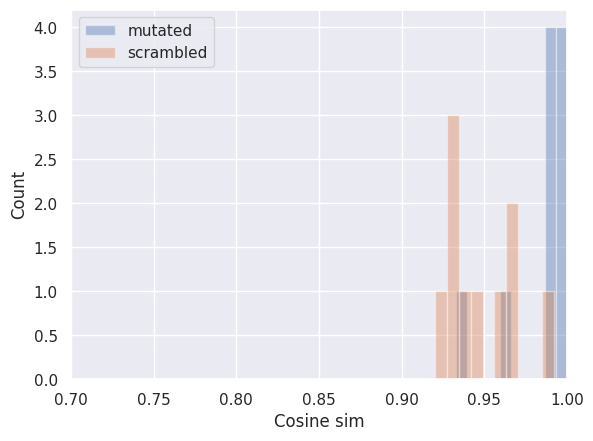

In [8]:
plot_res(metric_dict)